In [ ]:
!pip install geopandas
!pip install geoplot

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Crane 2020

In [38]:
df_crane = pd.read_csv('Common Crane 2020.csv')

In [18]:
len(set([ts.split()[0] for ts in df_crane['timestamp']]))

1319

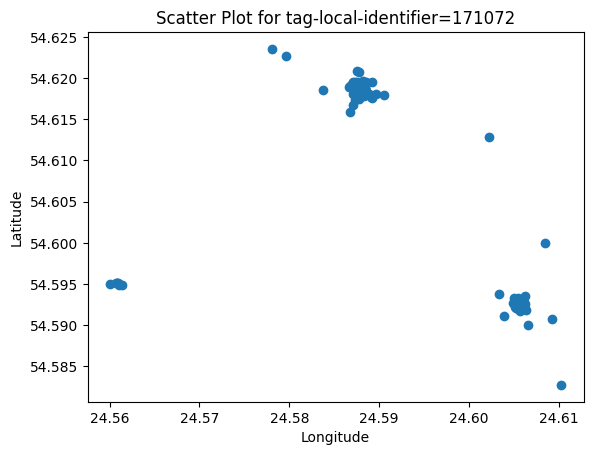

In [5]:
# Filter the DataFrame based on the condition
filtered_df = df_crane[df_crane['tag-local-identifier'] == 171072]

# Plot the scatter plot
plt.scatter(filtered_df['location-long'], filtered_df['location-lat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot for tag-local-identifier=171072')
plt.show()


C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_23712\2519514429.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


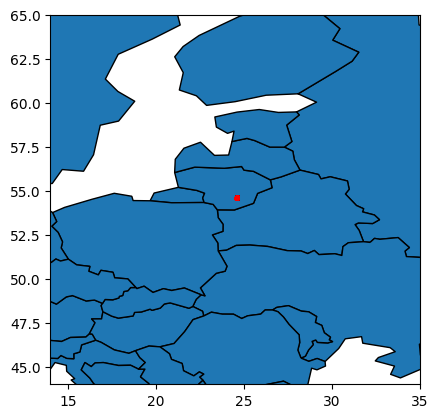

In [14]:
# Create a GeoDataFrame from the filtered DataFrame
gdf = gpd.GeoDataFrame(filtered_df, geometry=gpd.points_from_xy(filtered_df['location-long'], filtered_df['location-lat']))
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Plot the world map
base = world.plot(edgecolor='black')
# Plot the scatter plot on the world map
gdf.plot(ax=base, marker='o', color='red', markersize=5)

plt.xlim(14, 35)
plt.ylim(44, 65)

plt.show()

In [41]:
df_crane = df_crane[df_crane['tag-local-identifier'] == 181906]

df_crane['timestamp'] = df_crane['timestamp'].str.split().str[0]

# Drop unnecessary columns
df_crane_r = df_crane[['timestamp', 'location-long', 'location-lat']]

# Group by timestamp and calculate the average of long and lat values
df_crane_r = df_crane_r.groupby('timestamp').mean().reset_index()

In [46]:
df_crane_r.shape

(118672, 30)

C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_23712\3969986764.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


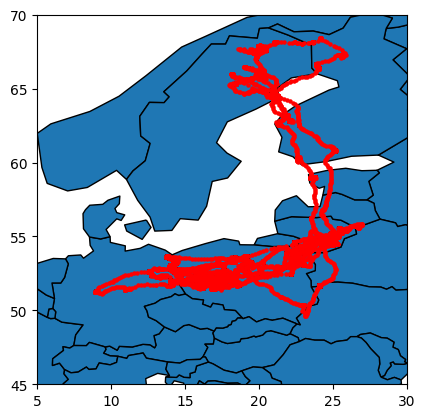

In [40]:
# Create a GeoDataFrame from the filtered DataFrame
gdf = gpd.GeoDataFrame(df_crane, geometry=gpd.points_from_xy(df_crane['location-long'], df_crane['location-lat']))
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Plot the world map
base = world.plot(edgecolor='black')
# Plot the scatter plot on the world map
gdf.plot(ax=base, marker='o', color='red', markersize=5)

plt.xlim(5, 30)
plt.ylim(45, 70)

plt.show()

C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_23712\113411895.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


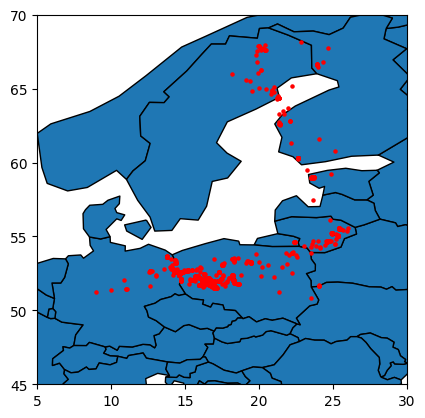

In [67]:
gdf = gpd.GeoDataFrame(df_crane_r, geometry=gpd.points_from_xy(df_crane_r['location-long'], df_crane_r['location-lat']))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=5)

plt.xlim(5, 30)
plt.ylim(45, 70)

plt.show()

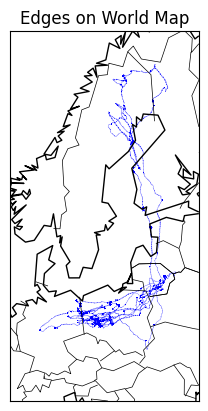

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Create a Basemap instance with the desired map projection
m = Basemap(projection='merc', llcrnrlat=45, urcrnrlat=70, llcrnrlon=5, urcrnrlon=30)

# Draw coastlines, countries, and states
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Convert longitude and latitude to map coordinates
x, y = m(df_crane['location-long'].values, df_crane['location-lat'].values)

# Plotting directed edges
m.quiver(x[:-1], y[:-1], x[1:] - x[:-1], y[1:] - y[:-1], scale_units='xy', angles='xy', scale=1, color='blue')

plt.title('Edges on World Map')
plt.show()

In [48]:
import os

# Create the "filtered" folder if it doesn't exist
folder_path = "filtered"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Define the file path
file_path = os.path.join(folder_path, "Common-Crane-2020.csv")

df_crane = df_crane[['timestamp', 'location-long', 'location-lat']]
# Save the DataFrame as a CSV file
df_crane.to_csv(file_path, index=False)


# Common Crane Lit

In [61]:
df_cranelit = pd.read_csv('Common Crane Lithuania GPS, 2015-2016.csv')
df_cranelit = df_cranelit[df_cranelit['tag-local-identifier'] == 15015]
df_cranelit = df_cranelit[['timestamp', 'location-long', 'location-lat']]
df_cranelit.shape

C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_23712\1722962545.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cranelit = pd.read_csv('Common Crane Lithuania GPS, 2015-2016.csv')


(74339, 3)

C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_23712\2993000041.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


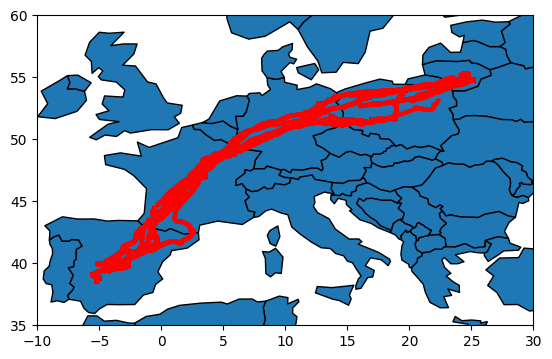

In [62]:
# Create a GeoDataFrame from the filtered DataFrame
gdf = gpd.GeoDataFrame(df_cranelit, geometry=gpd.points_from_xy(df_cranelit['location-long'], df_cranelit['location-lat']))
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Plot the world map
base = world.plot(edgecolor='black')
# Plot the scatter plot on the world map
gdf.plot(ax=base, marker='o', color='red', markersize=5)

plt.xlim(-10, 30)
plt.ylim(35, 60)
plt.show()

(1033, 3)


C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_23712\1615020982.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


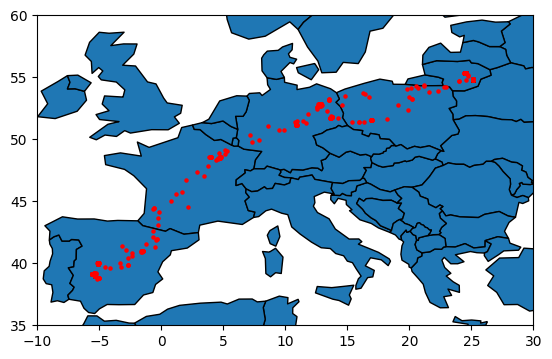

In [65]:
df_cranelit['timestamp'] = df_cranelit['timestamp'].str.split().str[0]
df_cranelit_r = df_cranelit.groupby('timestamp').mean().reset_index()
print(df_cranelit_r.shape)

gdf = gpd.GeoDataFrame(df_cranelit_r, geometry=gpd.points_from_xy(df_cranelit_r['location-long'], df_cranelit_r['location-lat']))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=5)

plt.xlim(-10, 30)
plt.ylim(35, 60)
plt.show()

In [66]:
# Define the file path
file_path = os.path.join(folder_path, "Common-Crane-lit.csv")
# Save the DataFrame as a CSV file
df_cranelit.to_csv(file_path, index=False)